In [2]:
# Fill in student ID and name
# 
student_id = "223149341"
student_first_last_name = "Van Nam Quang Nguyen"
print(student_id, student_first_last_name)

223149341 Van Nam Quang Nguyen


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.linear_model import LinearRegression

### 1. Loading the csv file and processing data

In [87]:
df = pd.read_csv('data.csv')
df

,Timestamp,Temperature,Humidity
0,2024-07-22 22:31:23,22.5,53.2
1,2024-07-22 22:31:25,22.5,52.9
2,2024-07-22 22:31:30,22.5,52.8
3,2024-07-22 22:31:35,22.5,52.7
4,2024-07-22 22:31:40,22.5,52.6
...,...,...,...
882,2024-07-23 01:26:02,20.0,55.0
883,2024-07-23 01:26:07,20.0,55.1
884,2024-07-23 01:26:12,19.9,55.1
885,2024-07-23 01:26:17,20.0,55.0


In [5]:
df.Timestamp = pd.to_datetime(df.Timestamp)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Timestamp    887 non-null    datetime64[ns]
 1   Temperature  887 non-null    float64       
 2   Humidity     887 non-null    float64       
dtypes: datetime64[ns](1), float64(2)
memory usage: 20.9 KB


### 2. Checking correlation between each features

<Axes: >

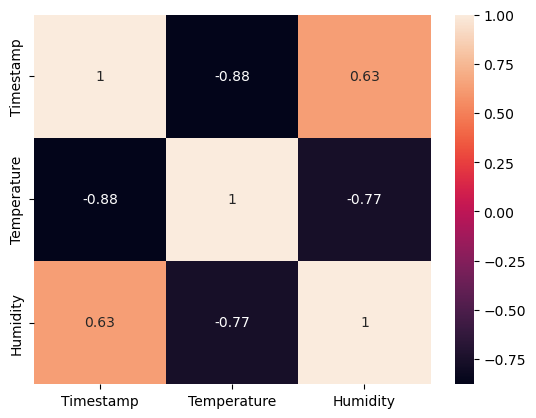

In [6]:
df.corr()
sns.heatmap(df.corr(), annot = True)

#### Conclusion
The correlation between temperature and humidity is approximately -0.77, indicating a strong negative relationship. This suggests that as the temperature increases, humidity tends to decrease, and vice versa. So that the linear regression line go down.

### 3. Fitting the Linear Regression model

#### a. Before removing outliers

In [106]:
X = df.Temperature.values.reshape(-1,1)
Y = df.Humidity

The accuracy of the model is  0.5862053514792112


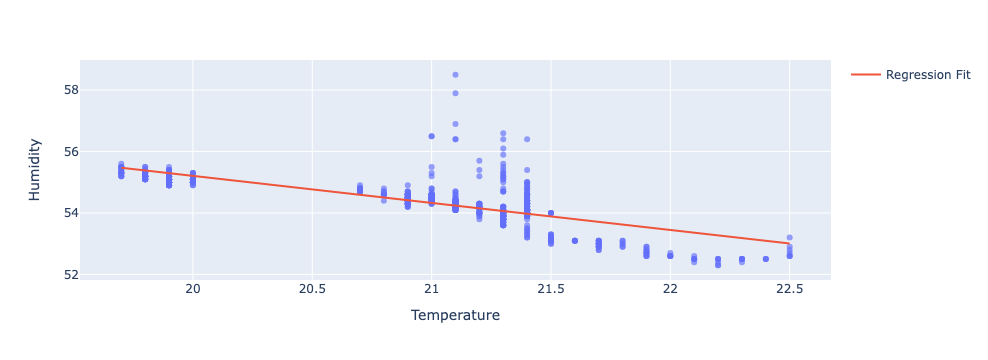

In [127]:
model = LinearRegression().fit(X, Y)
x_range = np.linspace(X.min(), X.max(), 100) # create test value 
y_range = model.predict(x_range.reshape(-1, 1))
fig = px.scatter(df, x='Temperature', y='Humidity', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range, y=y_range, name='Regression Fit'))
print("The accuracy of the model is ", model.score(X, Y))
fig.show()

In [93]:
df = pd.read_csv('data.csv')

#### Assumptions
The current model accuracy is approximately 0.59, indicating that the performance of the model is moderate. This suggests that there is still considerable variance in the predictions that the model is fit
- Observations reveal a general negative trend in the data; however, this trend line does not perfectly fit all of the data points. There are notable deviations where several data points are significantly distant from the trend line. These discrepancies can lead to a reduction in the model's effectiveness.
- Additionally, the presence of outliers, which are data points significantly different from the majority of the dataset, further complicates the accuracy of the model. These outliers do not align well with the regression line and can distort the model's overall performance. Their influence can contribute to a decrease in the model's accuracy, as the model struggles to account for these atypical data points.

#### b. After removing outliers

In [109]:
remove_humidity_df = df[df.Humidity <56]
remove_df = (remove_humidity_df.Humidity >= 55) & (remove_humidity_df.Temperature >= 21) & (remove_humidity_df.Temperature <= 21.4)
clean_df = remove_humidity_df[~remove_df]

0.7813841176144021


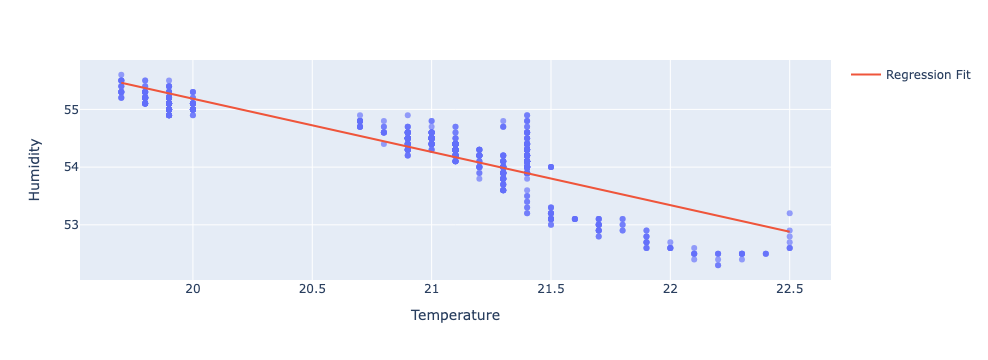

In [104]:
X1 = clean_df.Temperature.values.reshape(-1,1)
Y1 = clean_df.Humidity
model = LinearRegression().fit(X1, Y1)
print(model.score(X1, Y1))
x_range_clean = np.linspace(X1.min(), X1.max(), 100) # create test value 
y_range_clean = model.predict(x_range_clean.reshape(-1, 1))
fig = px.scatter(clean_df, x='Temperature', y='Humidity', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range_clean, y=y_range_clean, name='Regression Fit'))

#### c. Removing outlier using IQR method

In [112]:
def remove_outliers_iqr(df, columns=None):
    if columns is None:
        columns = df.columns

    Q1 = df[columns].quantile(0.25)
    Q3 = df[columns].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df_filtered = df[~((df[columns] < lower_bound) | (df[columns] > upper_bound)).any(axis=1)]

    return df_filtered

In [120]:
remove_n_df = df.copy()
remove_n_df = remove_outliers_iqr(remove_n_df)

0.4646845757139495


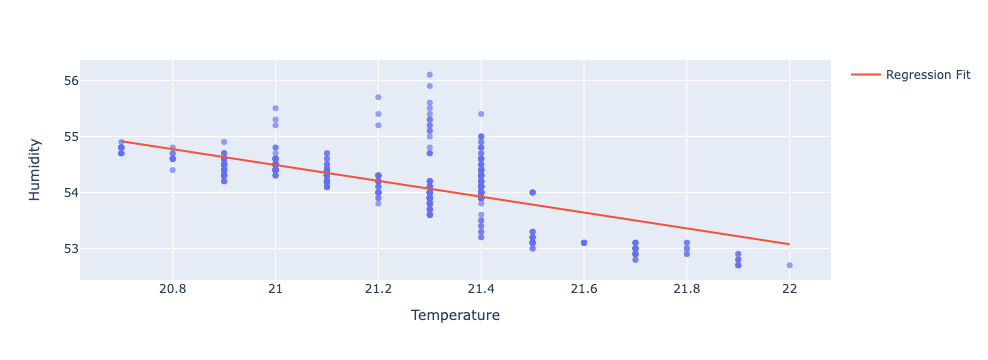

In [123]:
X2 = remove_n_df.Temperature.values.reshape(-1,1)
Y2 = remove_n_df.Humidity
model = LinearRegression().fit(X2, Y2)
x_range_n = np.linspace(X2.min(), X2.max(), 100) # create test value 
y_range_n = model.predict(x_range_n.reshape(-1, 1))
fig = px.scatter(remove_n_df, x='Temperature', y='Humidity', opacity=0.65)
fig.add_traces(go.Scatter(x=x_range_n, y=y_range_n, name='Regression Fit'))
print(model.score(X2, Y2))
fig.show()

#### Conclusion
Applying appropriate outlier removal techniques can significantly enhance the accuracy of the model, the regression line is much more fitted to the data:
- First Method (Human Observation): This approach resulted in a substantial improvement in accuracy, increasing from 0.59 to 0.78. This notable gain highlights the effectiveness of manual outlier removal in refining model performance.
- Second Method (IQR Method): In contrast, the Interquartile Range (IQR) method led to a decrease in accuracy, reducing it from 0.59 to 0.47. This decline is attributable to the removal of a considerable amount of sample data, including potentially valuable information.

Overall, while the human observation method proves advantageous, the IQR method may be less effective due to excessive data reduction.